# import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load and read data after we link with our drive

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Data_For_Analysis/Salaries.csv')
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


# Tasks

#1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

### info function give us many information about our dataset like:

*   number of rows 148654
*   number of columns 13
*   data types of each column as the shown output
*   and also from it we can notice if there are missing value or not (non null)
*   memory usage




In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


(# rows , # columns)

In [4]:
df.shape

(148654, 13)

data types in order

In [5]:
for col in df.iloc[0]:
  print(f"type {type(col)}\n")

type <class 'numpy.int64'>

type <class 'str'>

type <class 'str'>

type <class 'numpy.float64'>

type <class 'numpy.float64'>

type <class 'numpy.float64'>

type <class 'numpy.float64'>

type <class 'numpy.float64'>

type <class 'numpy.float64'>

type <class 'numpy.int64'>

type <class 'numpy.float64'>

type <class 'str'>

type <class 'numpy.float64'>



check for missing values in each column

In [6]:
df.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

## First insight
## there are missing values in these columns ▶ BasePay, OvertimePay, OtherPay, Benefits, Notes, Status

## also we notice that number of missing values in Notes, Status equal to number of rows in our data so they are empty and we can drop them

# 2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

### descibe function give us many information about numerical columns only

*   count
*   mean
*   standard deviation
*   min
*   max
*   median

In [7]:
df.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Status
count,148654.000000,148045.000000,148650.000000,148650.000000,112491.000000,148654.000000,148654.000000,148654.000000,0.0,0.0
mean,74327.500000,66325.448840,5066.059886,3648.767297,25007.893151,74768.321972,93692.554811,2012.522643,NaN,NaN
std,42912.857795,42764.635495,11454.380559,8056.601866,15402.215858,50517.005274,62793.533483,1.117538,NaN,NaN
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000,NaN,NaN
25%,37164.250000,33588.200000,0.000000,0.000000,11535.395000,36168.995000,44065.650000,2012.000000,NaN,NaN
50%,74327.500000,65007.450000,0.000000,811.270000,28628.620000,71426.610000,92404.090000,2013.000000,NaN,NaN
75%,111490.750000,94691.050000,4658.175000,4236.065000,35566.855000,105839.135000,132876.450000,2014.000000,NaN,NaN
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000,NaN,NaN


##<font color='green'>**The Insight : There Is Skewness Depends On Previous Columns**</font>

descibe for TotalPay only

In [8]:
df['TotalPay'].describe()

count    148654.000000
mean      74768.321972
std       50517.005274
min        -618.130000
25%       36168.995000
50%       71426.610000
75%      105839.135000
max      567595.430000
Name: TotalPay, dtype: float64

Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation using aggregate function

In [9]:
import statistics as st

n_min,n_max = df['TotalPay'].agg(['min', 'max'])

def sal_range( n_min, n_max ):
  return f"salary range\t {n_max - n_min}"

ran = sal_range( n_min, n_max )
print(df['TotalPay'].agg(['mean','median', st.mode, 'std', 'min', 'max']))
print(ran)

mean       74768.321972
median     71426.610000
mode           0.000000
std        50517.005274
min         -618.130000
max       567595.430000
Name: TotalPay, dtype: float64
salary range	 568213.56


# 3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

## Here we notice that the columns Notes & Status are entirly missing and equal to number of records so that we will drop them

In [10]:
df.shape[0]

148654

In [11]:
df.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

In [12]:
df_new = df.copy()
df_new.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [13]:
df_new.drop(columns=['Notes', 'Status'],inplace=True)
df_new.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,San Francisco


In [14]:
df_new.isnull().sum()

Id                      0
EmployeeName            0
JobTitle                0
BasePay               609
OvertimePay             4
OtherPay                4
Benefits            36163
TotalPay                0
TotalPayBenefits        0
Year                    0
Agency                  0
dtype: int64

## here we will plot kde with boxplot for each features that has missing values to see if there are outliers or not or it has normal distripution to know how to fill the missing values for thease columns : BasePay, OvertimePay, OtherPay, Benefits

## all previous columns are numeric

In [15]:
df_salary = df_new.loc[:,['BasePay', 'OvertimePay', 'OtherPay', 'Benefits']]
df_salary.head()

,BasePay,OvertimePay,OtherPay,Benefits
0,167411.18,0.00,400184.25,NaN
1,155966.02,245131.88,137811.38,NaN
2,212739.13,106088.18,16452.60,NaN
3,77916.00,56120.71,198306.90,NaN
4,134401.60,9737.00,182234.59,NaN


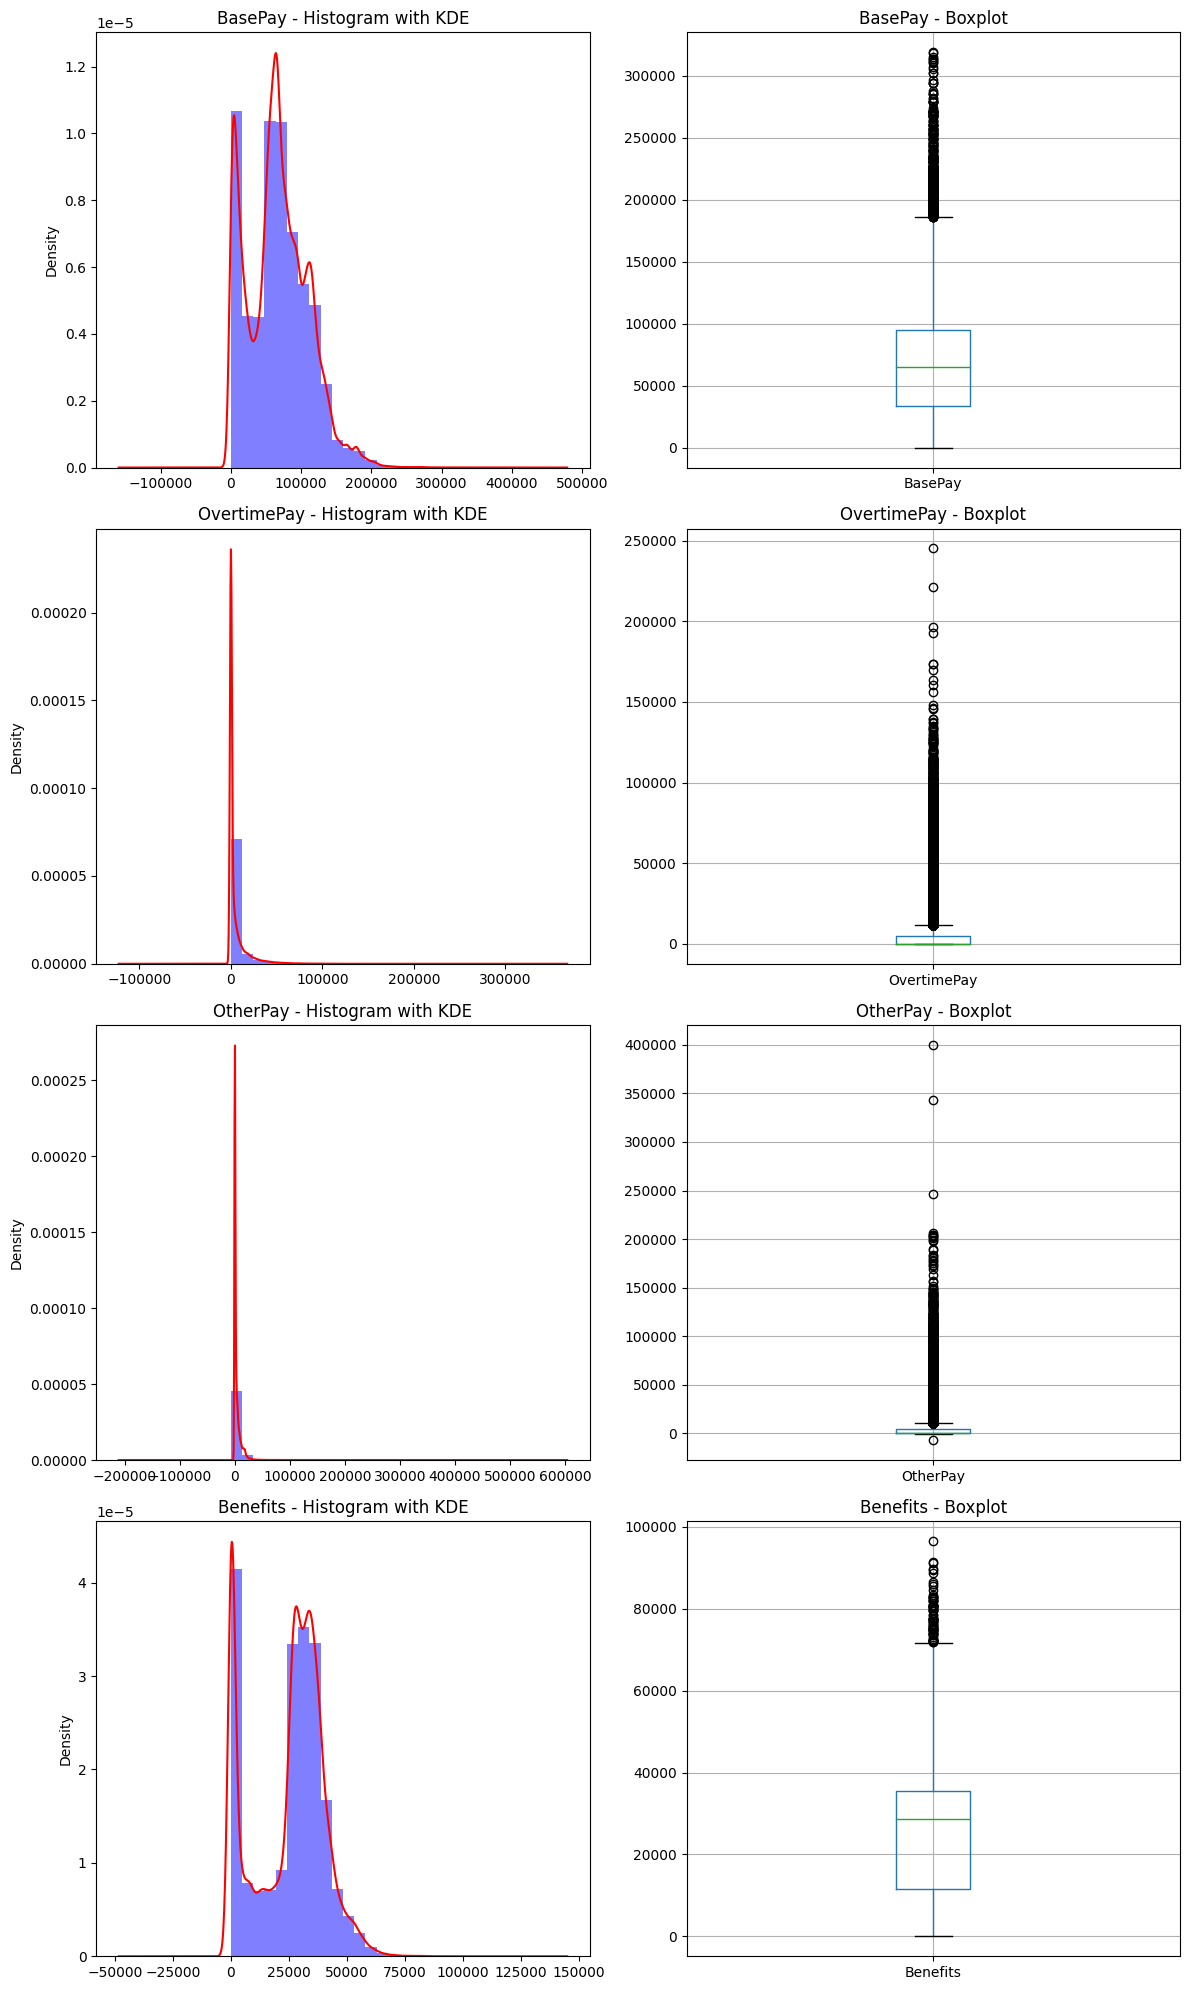

In [16]:
fig, axes = plt.subplots(len(df_salary.columns), 2, figsize=(12, 5 * len(df_salary.columns)))

for i, col in enumerate(df_salary.columns):
    # Histogram with KDE
    df_salary[col].plot(kind='hist', density=True, ax=axes[i, 0], bins=20, alpha=0.5, color='blue')
    df_salary[col].plot(kind='kde', ax=axes[i, 0], color='red')
    axes[i, 0].set_title(f'{col} - Histogram with KDE')

    # Boxplot
    df_salary.boxplot(column=col, ax=axes[i, 1])
    axes[i, 1].set_title(f'{col} - Boxplot')

plt.tight_layout()
plt.show()

## From Previous kde and box plots we see that there are outliers so best method to fill the missing values is median (it is suitable for outliers)

In [17]:
df_new.isnull().sum()

Id                      0
EmployeeName            0
JobTitle                0
BasePay               609
OvertimePay             4
OtherPay                4
Benefits            36163
TotalPay                0
TotalPayBenefits        0
Year                    0
Agency                  0
dtype: int64

In [18]:
for col in ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits']:
  df_new[col] = df_new[col].fillna(df_new[col].median())

In [19]:
df_new.isnull().sum()

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64

## We can Use also SimpleImputer

# 4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

In [20]:
cols = ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits']

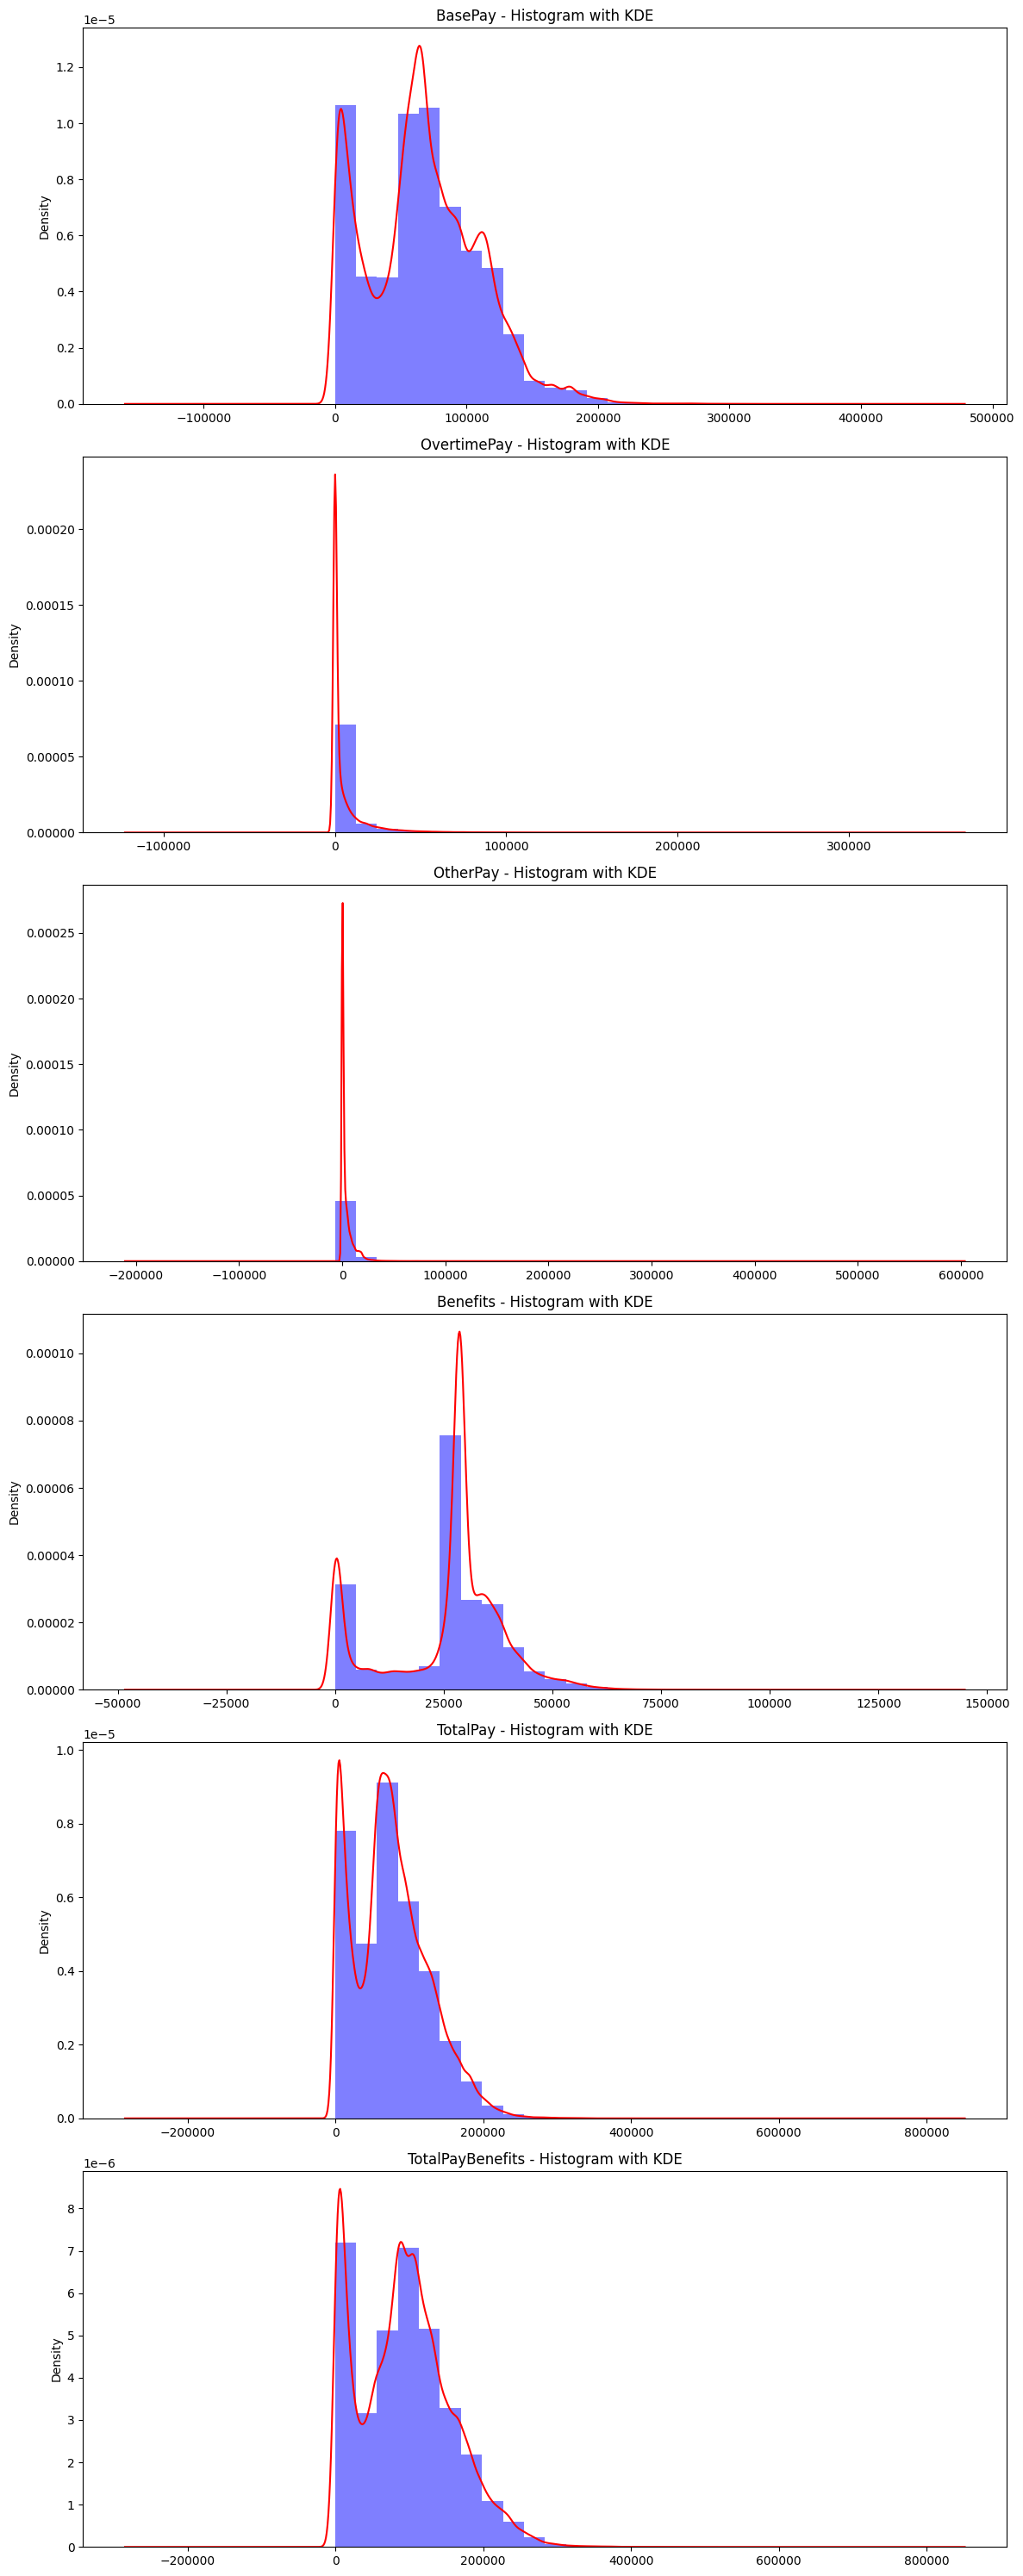

In [21]:
fig, axes = plt.subplots(len(cols), 1, figsize=(12, 5 * len(cols)))

for i, col in enumerate(cols):
    # Histogram with KDE
    df_new[col].plot(kind='hist', density=True, ax=axes[i], bins=20, alpha=0.5, color='blue')
    df_new[col].plot(kind='kde', ax=axes[i], color='red')
    axes[i].set_title(f'{col} - Histogram with KDE')

plt.tight_layout()
plt.show()

## Here we will focus on TotalPay column (salary), we notice that most salaries from zero 0 to 250000 (density). There is no salary with 0 it starts from for example 10000 or there are internship trainees with no salary

## use pie charts to represent the proportion of employees in different departments.

## Here we plot pie plot depends on Jobtitle column because there is no departement column to draw depends on it

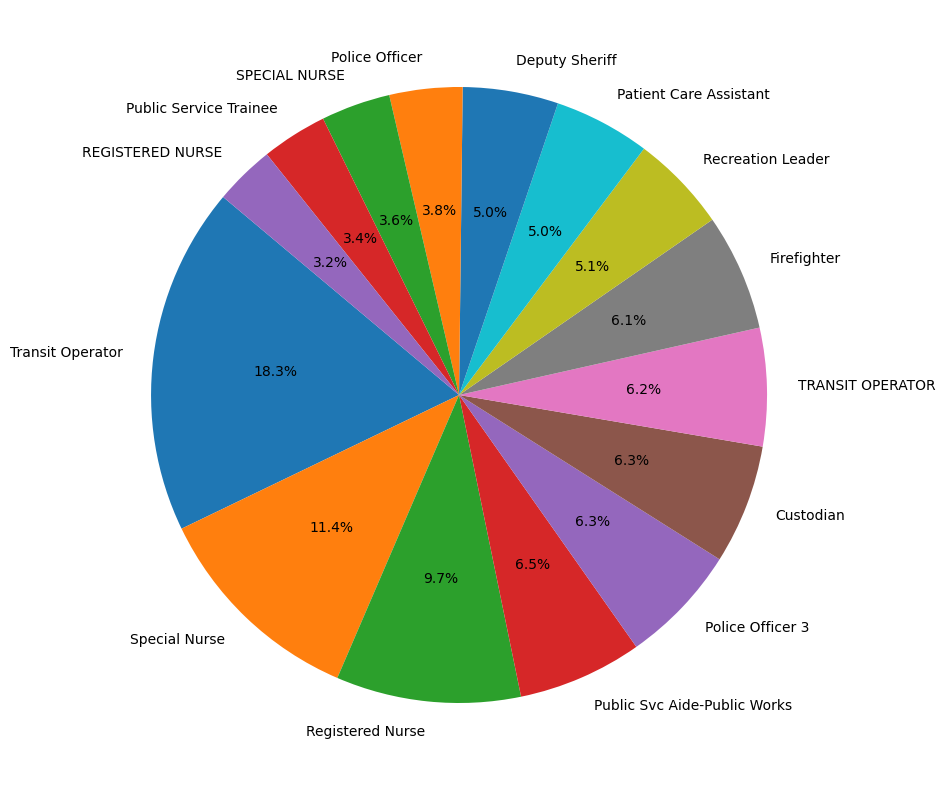

In [22]:
d_count = df_new['JobTitle'].value_counts()[:15]
plt.figure(figsize=(20,10))
plt.pie(d_count,labels=d_count.index, autopct='%1.1f%%', startangle=140)
plt.show()

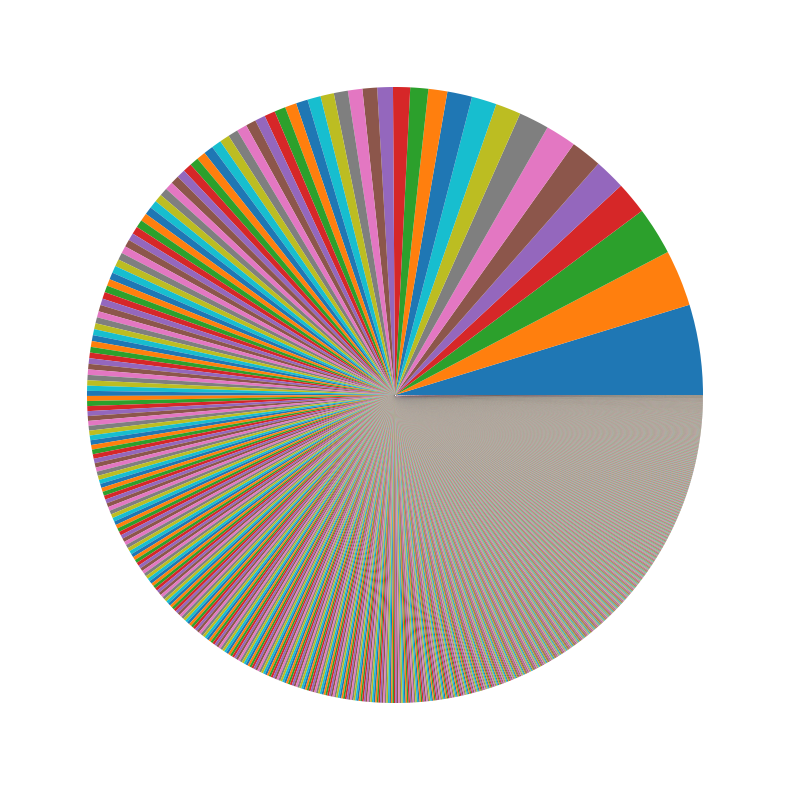

In [23]:
depart_counts = df_new['JobTitle'].value_counts()
plt.figure(figsize=(20,10))
plt.pie(depart_counts)
plt.show()

In [24]:
arr = np.array(df_new['BasePay'])
arr

array([167411.18, 155966.02, 212739.13, ...,  65007.45,  65007.45,
            0.  ])

In [25]:
def make_class_sal(arr):
  list_class =[]
  for i in range(len(arr)):
      if arr[i] in range(100000):
        list_class.append("junior")
      elif arr[i] in range(100000,200000):
        list_class.append("mid level")
      elif arr[i] in range(200000,300000):
        list_class.append("senior")
      elif arr[i] > 300000:
        list_class.append("Expert")
      else:
        list_class.append("unexpected value")
  return list_class

In [26]:
# ad = make_class_sal(arr)
# ad

In [27]:
# df = pd.DataFrame(list_class)
# print(df)

# 5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

In [28]:
df_new.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Agency'],
      dtype='object')

## Here we count the number of employees in each JobTitle like in each departemnet

In [29]:
df_new.groupby('JobTitle')['Id'].nunique()

JobTitle
ACCOUNT CLERK                                      83
ACCOUNTANT                                          5
ACCOUNTANT INTERN                                  48
ACPO,JuvP, Juv Prob (SFERS)                         1
ACUPUNCTURIST                                       1
                                                 ... 
X-RAY LABORATORY AIDE                              26
X-Ray Laboratory Aide                             100
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS      1
Youth Comm Advisor                                  4
ZOO CURATOR                                         1
Name: Id, Length: 2159, dtype: int64

## Job Title with  Max number of employees

In [30]:
df_new.groupby('JobTitle')['Id'].nunique().idxmax()

'Transit Operator'

## Job Title with  Max average BasePay in a list of job titles

In [31]:
df_new.groupby('JobTitle')['BasePay'].mean().idxmax()

'Chief of Police'

## Job Title with  Max average Overtime Pay in a list of job titles

In [32]:
df_new.groupby('JobTitle')['OvertimePay'].mean().idxmax()

'Wire Rope Cable Maint Sprv'

## Job Title with  Max average Other Pay in a list of job titles

In [33]:
df_new.groupby('JobTitle')['OtherPay'].mean().idxmax()

'GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY'

## Job Title with  Max average Benefits in a list of job titles

In [34]:
df_new.groupby('JobTitle')['Benefits'].mean().idxmax()

'Chief Investment Officer'

## Job Title with  Max average Total Pay (salary) in a list of job titles

In [35]:
df_new.groupby('JobTitle')['TotalPay'].mean().idxmax()

'GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY'

## Job Title with  Max average Total Pay Benefits in a list of job titles

In [36]:
df_new.groupby('JobTitle')['TotalPayBenefits'].mean().idxmax()

'Chief Investment Officer'

# 6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

##<font color='brown'>**We Will Compute The Correlation Between Numeric Features And Plot The Heatmap Between Them**</font>

## Here we plot heatmap for numeric features only to see the correlation with these features

<ipython-input-37-ef34b371c2ca>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_new.corr()


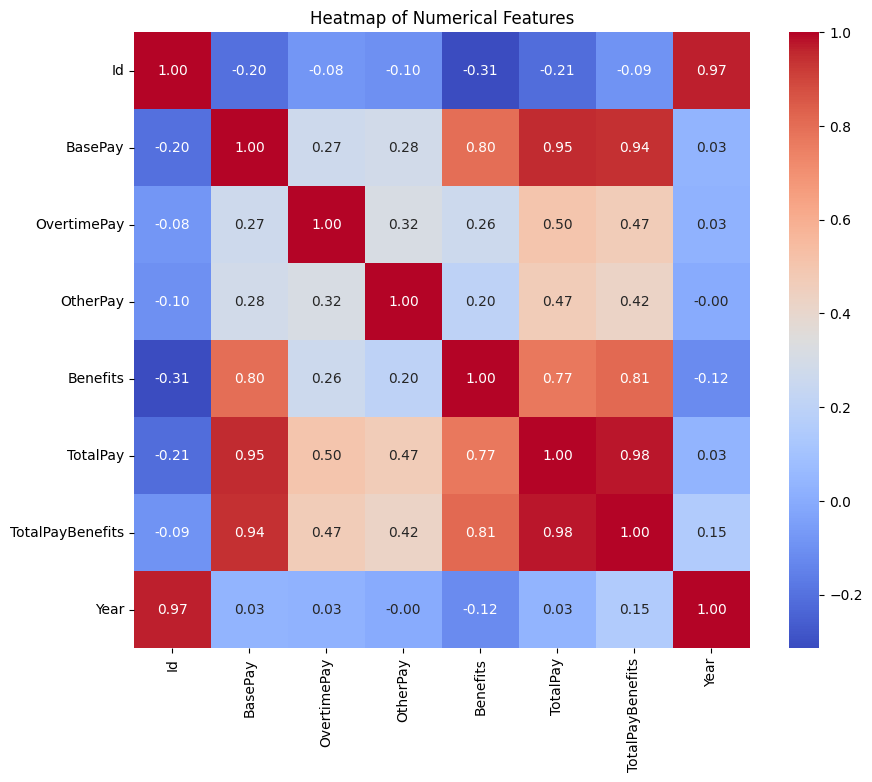

In [37]:
corr = df_new.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Heatmap of Numerical Features')
plt.show()

# From previous heatmap we see high correlation between salary(BasePay) and Benefits 0.80

## Here we plot heatmap with JobTitle column after we encoded it with LabelEncoder (turn it to numeric) to see the correlation with these features

In [38]:
df_cat = df_new.copy()

In [39]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in columns.
df_cat.loc[:,'JobTitle'] = label_encoder.fit_transform(df_cat.loc[:,'JobTitle'])
df_cat['JobTitle']

<ipython-input-39-bfa2f9103b76>:9: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_cat.loc[:,'JobTitle'] = label_encoder.fit_transform(df_cat.loc[:,'JobTitle'])


0          831
1          293
2          293
3         2125
4          576
          ... 
148649     562
148650    1274
148651    1274
148652    1274
148653     523
Name: JobTitle, Length: 148654, dtype: int64

<ipython-input-40-847b810a925f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_cat.corr()


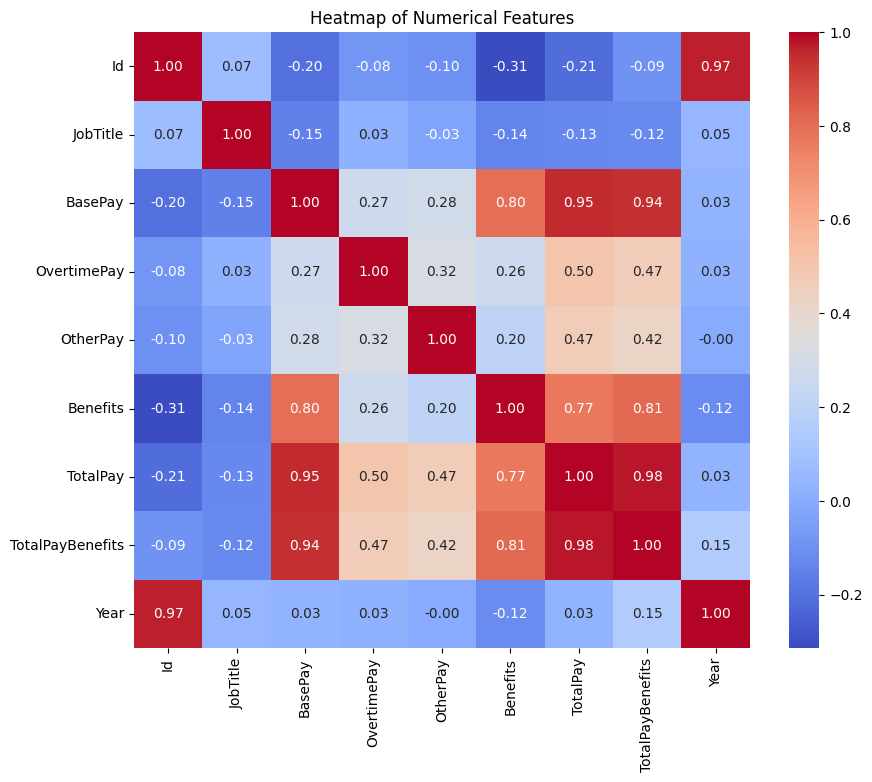

In [40]:
corr = df_cat.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Heatmap of Numerical Features')
plt.show()

## From previous heatmap we see high correlation also between salary(BasePay) and Benefits 0.80 and we will plot scatter plot for both data df_new (basic) and df_cat (after we encoded the jobtitle column) Between salary(BasePay) and Benefits

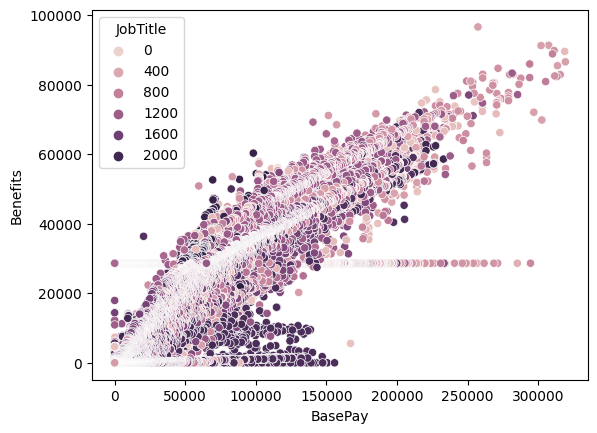

In [41]:
sns.scatterplot(data=df_cat, x="BasePay", y="Benefits", hue="JobTitle");

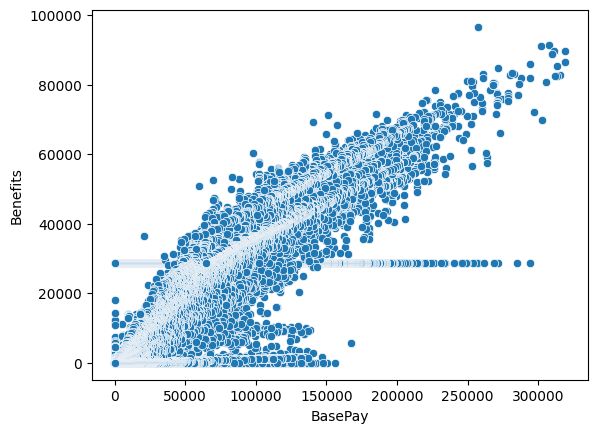

In [42]:
sns.scatterplot(data=df_new, x="BasePay", y="Benefits");

## So from previous scatter plot we see that there is a linear positive correlation between salary(BasePay) and Benefits

#8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

#<font color='darker'>**Insights**</font>
##<font color='darker'>**First insight:**</font>
##<font color='green'>**The data has 148654 records and 13 columns there are missing values in these columns ▶ BasePay, OvertimePay, OtherPay, Benefits, Notes, Status  also we notice that number of missing values in Notes, Status equal to number of rows in our data so they are empty and we can drop them**</font>
##<font color='darker'>**Second insight:**</font>
##<font color='green'>**We notice skewness after we call describe() function and We make Descriptive Statistics for TotalPay column because it is the salary for all employees depends on data description. ▶ mean: 74768.321972 | median: 71426.610000 | mode: 0.000000 | std: 50517.005274 | min: -618.130000 | max: 567595.430000 | salary range: 568213.56**</font>
##<font color='darker'>**Third insight:**</font>
##<font color='green'>**Data cleaning, Here we notice that the columns Notes & Status are entirly missing and equal to number of records so that we will drop them, Then we plot kde with boxplot for each features that has missing values to see if there are outliers or not or it has normal distripution to know how to fill the missing values for these numeric columns : BasePay, OvertimePay, OtherPay, Benefits so that From Previous kde and box plots we see that there are outliers so best method to fill the missing values is median (it is suitable for outliers)**</font>
##<font color='darker'>**Fourth insight:**</font>
##<font color='green'>**We make hist with kde plot for these columns ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits'] to see the distribution for each feature From the plot of TotalPay we notice that most salaries from zero 0 to 250000 (density). There is no salary with 0 it starts from for example 10000 or there are internship trainees with no salary. Moving to pie chart Here we plot pie plot depends on Jobtitle column because there is no departement column to draw depends on it and because of large list of job titles we choose first 15 record to represent the proportion of employees in different departments.**</font>
##<font color='darker'>**Fifth insight:**</font>
##<font color='green'>**We Group the data by one column to calculate summary statistics for each group, and find the max average salaries across different groups. We count the number of employees in each JobTitle like in each departemnet || Find Job Title with  Max number of employees || Find Job Title with  Max average BasePay in a list of job titles || Find Job Title with  Max average Overtime Pay in a list of job titles || Find Job Title with  Max average Other Pay in a list of job titles || Find Job Title with  Max average Benefits in a list of job titles || Find Job Title with  Max average Total Pay (salary) in a list of job titles || Find Job Title with  Max average Total Pay Benefits in a list of job titles**</font>
##<font color='darker'>**Sixth insight:**</font>
##<font color='green'>**We Compute The Correlation Between Numeric Features And Plot The Heatmap Between Them, Then we see high correlation Between BasePay (salary) and Benefits which is 0.80 and also we encoded the jobtitle feature to be numeric and plot heatmap again but we don't see only low correlation between basepay and jobtitle then we plot scatter plot between BasePay and Benefits to determine the correlation and we see that the correlation between them is positive linear correlation**</font>